In [21]:
# Import Dependencies
import os
import numpy as np
import pandas as pd
import utils as utils

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, dbscan
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
# import warnings
#   warnings.filterwarnings("ignore")

### Preprocessing

In [2]:
# Import and read the data
df_raw = pd.read_csv("data/top_10000_1960-now.csv")

In [3]:
df_raw.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [4]:
# list columns for features and target
df_raw.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')

In [5]:
# Drop unnecessary columns
# Listing all columns for review
# all columns are listed
# commenting out the columns to keep
df_data = df_raw.drop(['Track URI',
                       #'Track Name',
                       'Artist URI(s)',
                       'Artist Name(s)',
                       'Album URI',
                       'Album Name',
                       'Album Artist URI(s)',
                       'Album Artist Name(s)',
                       'Album Release Date',
                       'Album Image URL',
                       'Disc Number',
                       'Track Number',
                       'Track Duration (ms)',
                       'Track Preview URL',
                       'Explicit',
                       'Popularity',
                       'ISRC',
                       'Added By',
                       'Added At',
                       'Artist Genres',
                       #'Danceability',
                       #'Energy',
                       #'Key',
                       'Loudness',
                       'Mode',
                       #'Speechiness',
                       #'Acousticness',
                       #'Instrumentalness',
                       #'Liveness',
                       #'Valence',
                       #'Tempo',
                       'Time Signature',
                       'Album Genres',
                       'Label',
                       'Copyrights'],
                       axis=1)

In [6]:
# Renaming columns to convention
df_data = df_data.rename(columns={
                   'Track Name': 'song',
                   'Album Image URL': 'image',
                   'Popularity': 'popularity',
                   'Danceability': 'danceability',
                   'Energy': 'energy',
                   'Key': 'key',
                   'Speechiness': 'speechiness',
                   'Acousticness': 'acousticness',
                   'Instrumentalness': 'instrumentalness',
                   'Liveness': 'liveness',
                   'Valence': 'valence',
                   'Tempo': 'tempo'
       })

In [7]:
# Verifying name update and
# Reviewing datatypes for analysis
df_data.dtypes

song                 object
danceability        float64
energy              float64
key                 float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [8]:
# removing duplicates
df_data = df_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [9]:
df_data.head()

,song,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Justified & Ancient - Stand by the Jams,0.617,0.872,8.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458
1,I Know You Want Me (Calle Ocho),0.825,0.743,2.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045
2,From the Bottom of My Broken Heart,0.677,0.665,7.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981
3,Apeman - 2014 Remastered Version,0.683,0.728,9.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311
4,You Can't Always Get What You Want,0.319,0.627,0.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818


In [10]:
# drop nulls
df_data = df_data.dropna()
# reset index
df_data = df_data.reset_index(drop=True)


In [11]:
# # Convert 'explicit' column from boolean to binary
# df_data['explicit'] = df_data['explicit'].astype(int)
# # verify update
# df_data.head()

In [12]:
# add a numerical 'song_id' column for analysis
df_data = df_data.reset_index(names='song_id') 
df_data['song_id'] = df_data.index.to_series()


In [13]:
df_data.head()

,song_id,song,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Justified & Ancient - Stand by the Jams,0.617,0.872,8.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458
1,1,I Know You Want Me (Calle Ocho),0.825,0.743,2.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045
2,2,From the Bottom of My Broken Heart,0.677,0.665,7.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981
3,3,Apeman - 2014 Remastered Version,0.683,0.728,9.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311
4,4,You Can't Always Get What You Want,0.319,0.627,0.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818


In [14]:
# call the scaler
scaler_minmax = MinMaxScaler()
scaler_standardscaler = StandardScaler()

In [15]:
# create our features dataframe
df_features = df_data[['danceability', 'energy', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [16]:
# create X for analysis
X = df_features

In [17]:
# fit__transform the features
X_scaled_minmaz = scaler_minmax.fit_transform(X)
X_scaled_stdsclr = scaler_standardscaler.fit_transform(X)

## KNN Testing

## K-Means

In [19]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(df_features)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,6.829392e+06
1,2,2.829782e+06
2,3,1.214001e+06
3,4,8.309714e+05
4,5,5.892906e+05
5,6,4.853729e+05
6,7,3.869834e+05
7,8,3.246689e+05
8,9,2.859373e+05
9,10,2.668206e+05


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

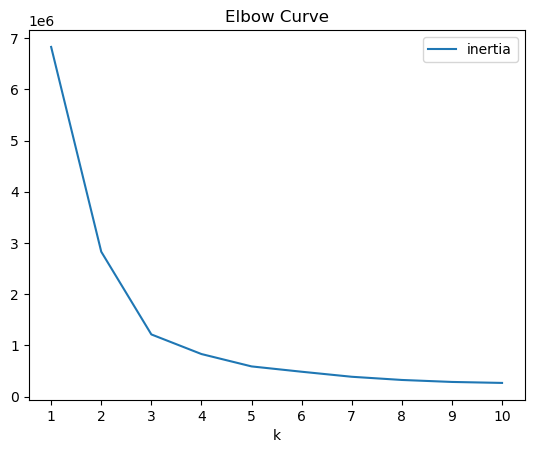

In [20]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [23]:
# Create a list to store values and the values of k
score_kmeans = []
score_agglomerative = []
score_birch = []

# Create a list to set the range of k values to test
k = list(range(2, 11))

In [25]:
from sklearn import metrics
# For each model, we iterate through the different cluster count (`i`). 
# Then, calculate the variance ratio for each algorithm, given that specified cluster count.

for i in k:
    # Kmeans variance and score
    k_model = KMeans(n_clusters=i, n_init='auto',random_state=0)
    k_model.fit(df_features)
    labels = k_model.labels_
    score = metrics.calinski_harabasz_score(df_features, labels)    
    score_kmeans.append(score)
    
    # AgglomerativeClustering variance and score
    agglo_model = AgglomerativeClustering(n_clusters=i)
    agglo_predictions = agglo_model.fit_predict(df_features)
    labels = agglo_model.labels_
    score = metrics.calinski_harabasz_score(df_features, labels)    
    score_agglomerative.append(score)    
    
    # Birch variance and score
    birch_model = Birch(n_clusters=i)
    birch_model.fit(df_features)
    labels = birch_model.labels_
    score = metrics.calinski_harabasz_score(df_features, labels)    
    score_birch.append(score)

In [26]:
# Display the scores. 
display(score_kmeans)
display(score_agglomerative)
display(score_birch)

[13722.735657106057,
 13722.735657106057,
 22452.35515946345,
 23356.89213611639,
 25694.782786655203,
 25369.75723553383,
 26925.02035684971,
 27771.531173579773,
 27752.977232741985,
 26511.50969038444]

[9374.25311737498,
 9374.25311737498,
 18842.756419323185,
 22828.02689311632,
 22095.83544954248,
 23398.501677760767,
 25271.062412603245,
 25421.456189582157,
 25209.30342508015,
 25045.94434974505]

[13357.483862843483,
 15675.742635093196,
 18283.280352412112,
 23157.891335455166,
 22907.84941202969,
 21666.866002245435,
 22205.526573990395,
 24331.29966369695,
 22625.754801357096]

In [ ]:
# create and initialize the k--means instance
k_model = KMeans(n_clusters=3, n_init='auto', random_state=1)
# review model
k_model

In [ ]:
# fit the model
k_model.fit(df_features)

In [ ]:
k_prediction = k_model.predict(df_features)

In [ ]:
k_prediction

In [ ]:
import matplotlib

In [ ]:
k_prediction = pd.DataFrame(k_prediction)
k_prediction.plot.scatter(x='this thing', # create pca1 and pca2 for analysis???
                          y='other thing',
                          c='centroids',
                          colormap='winter')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Example target labels (binary classification)
# Replace this with your actual target column
y = df_data['song']

In [ ]:
# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Gaussian Model

### what other models to test?
- gaussian?
- DBSCAN?
- agglomarative clustering?
